In [1]:
%%time
# just in-case installs
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels


CPU times: total: 62.5 ms
Wall time: 1min 8s


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from warnings import filterwarnings
filterwarnings("ignore")


In [3]:
df=pd.read_csv('Car details v3.csv')


In [4]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df['mileage'].value_counts()

18.9 kmpl      225
19.7 kmpl      173
18.6 kmpl      164
21.1 kmpl      157
17.0 kmpl      133
              ... 
16.34 kmpl       1
19.69 kmpl       1
20.88 km/kg      1
17.8 km/kg       1
16.51 kmpl       1
Name: mileage, Length: 393, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def EDA(df, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if df[i].dtypes == "object":
            cat.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(data=df, x=i)
        else:
            con.append(i)

    for i in con:
        plt.subplot(u, 2, x)
        x = x + 1
        sns.distplot(df[i].dropna(), kde=False)  

    print(df[con].corr())

                   year  selling_price  km_driven     seats
year           1.000000       0.414092  -0.418006 -0.009144
selling_price  0.414092       1.000000  -0.225534  0.041358
km_driven     -0.418006      -0.225534   1.000000  0.227336
seats         -0.009144       0.041358   0.227336  1.000000


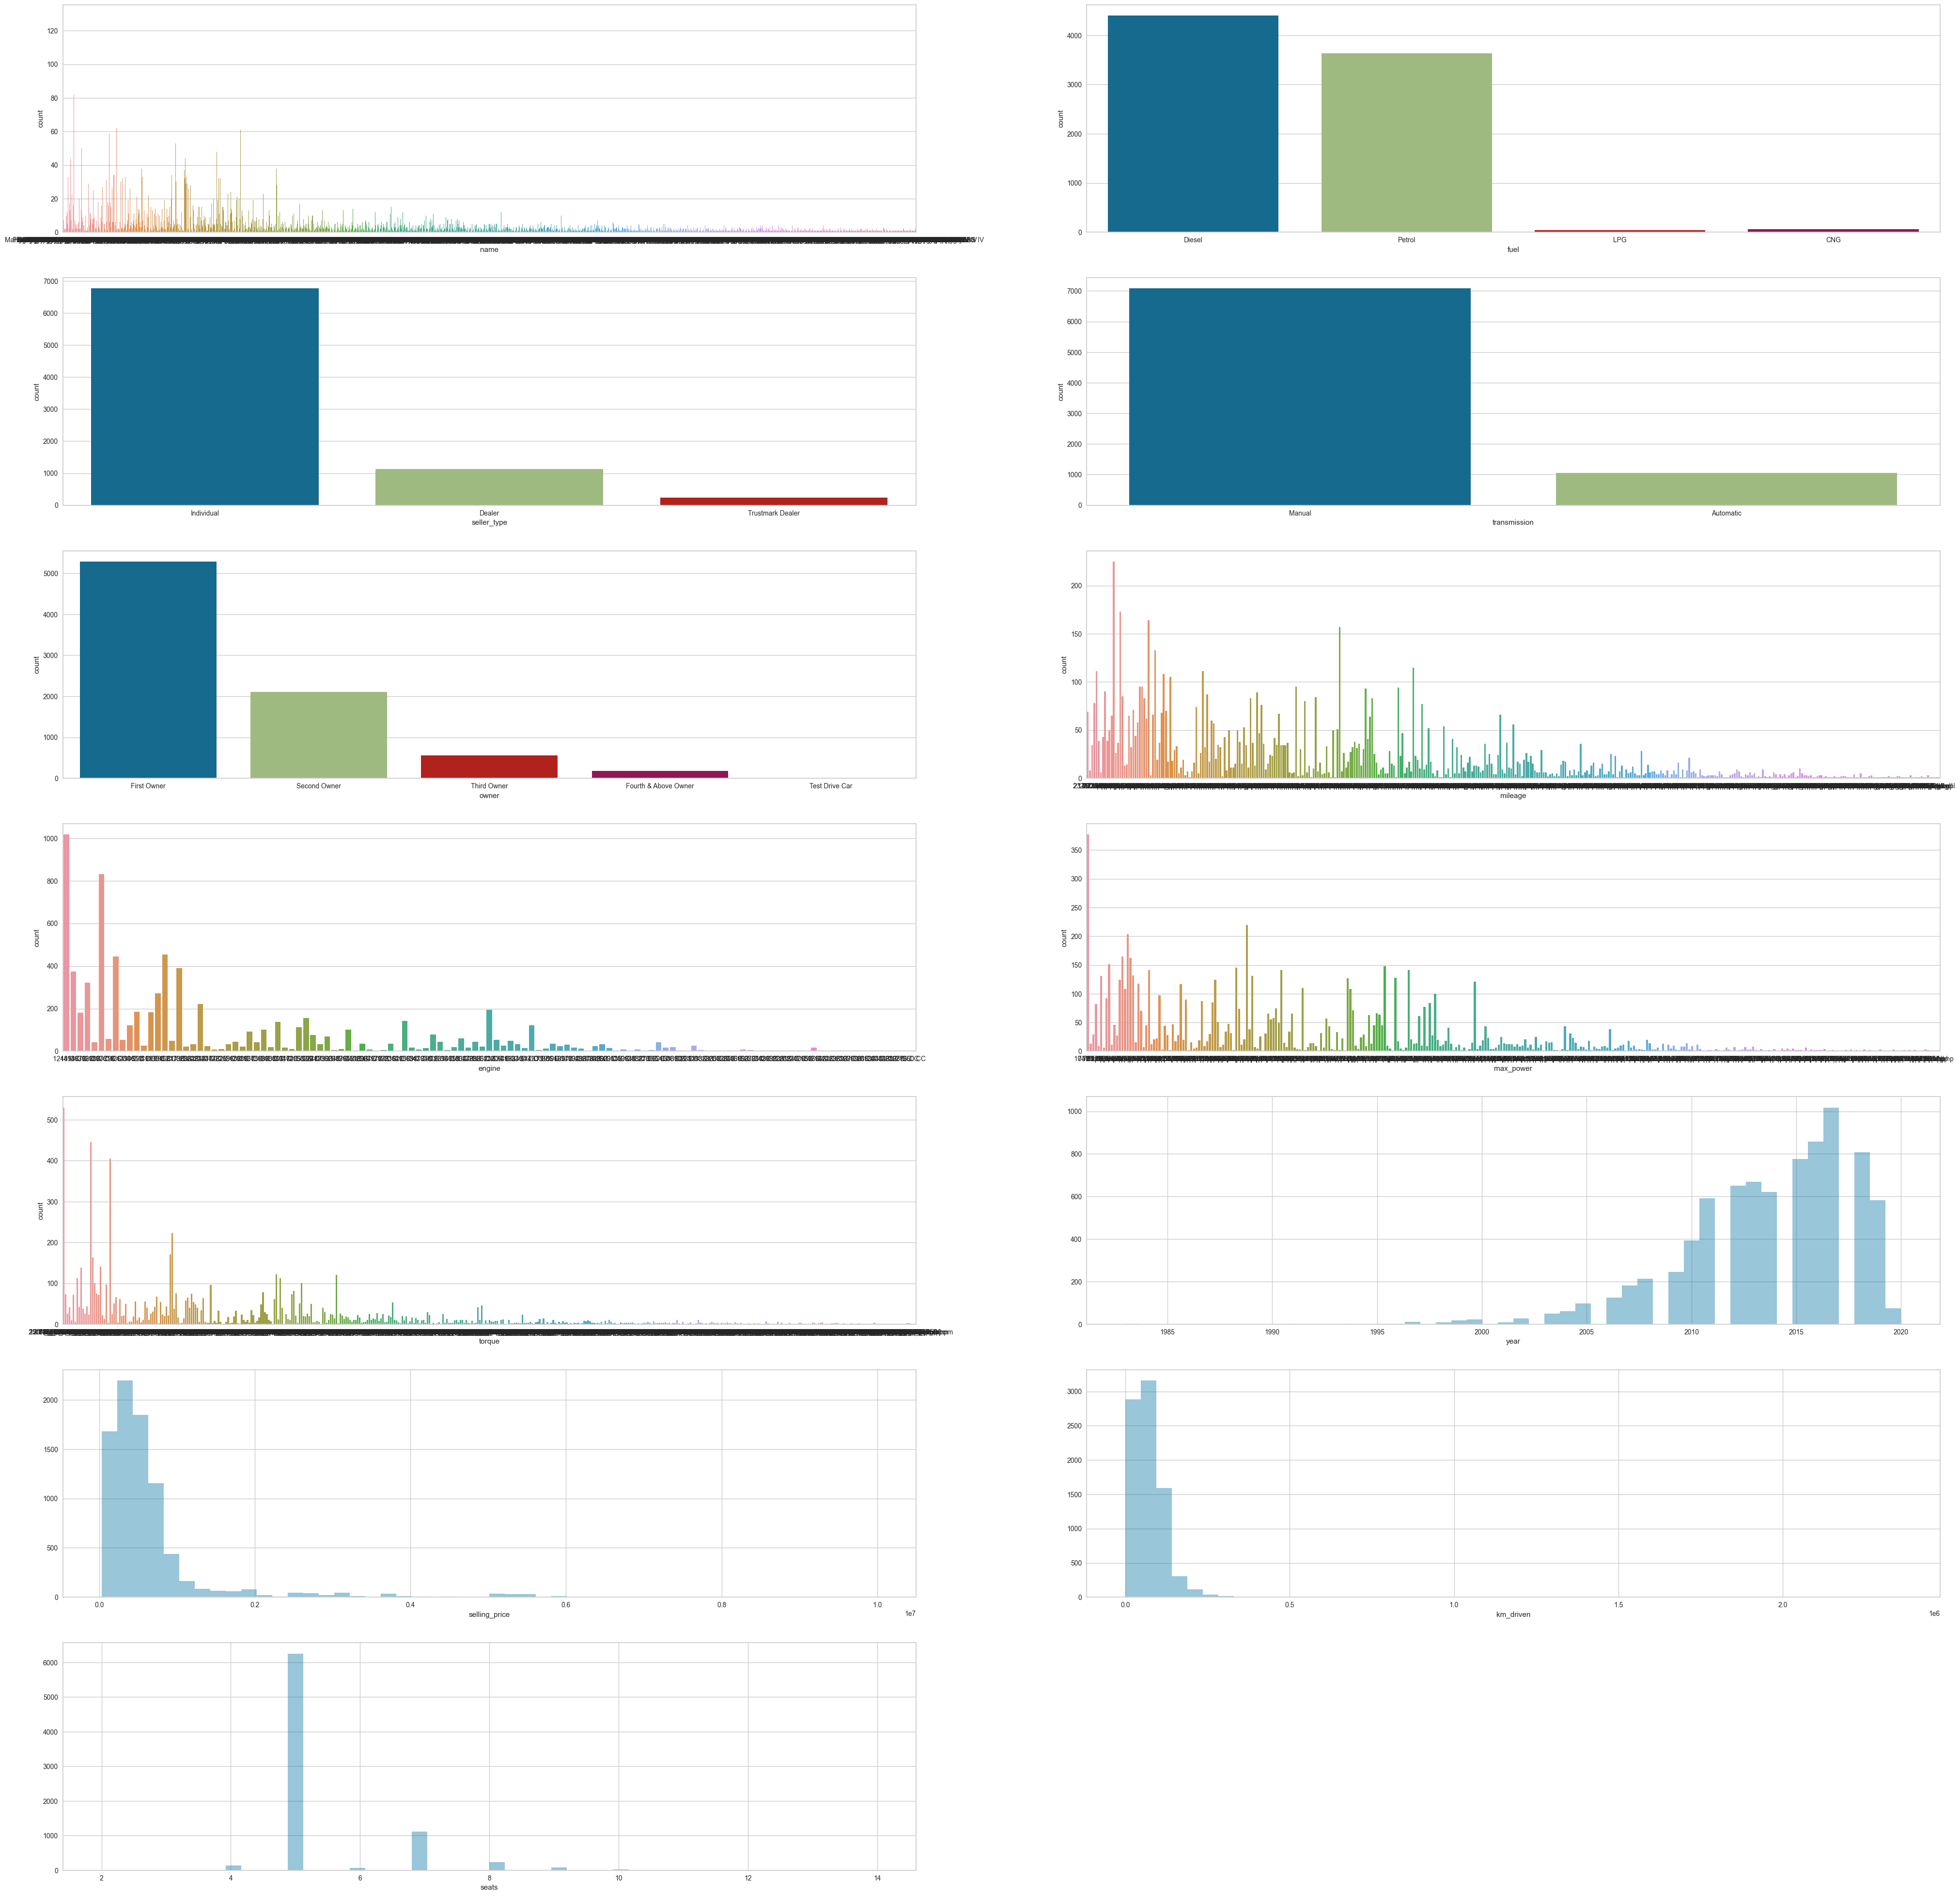

In [7]:
EDA(df, (50, 50))

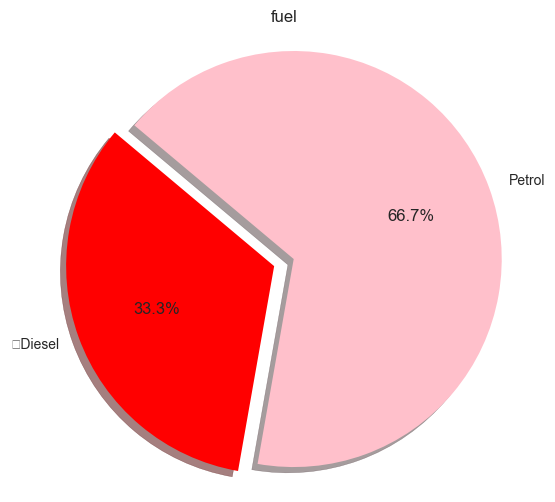

In [9]:
import matplotlib.pyplot as plt

# Sample data for the pie chart
labels = ['	Diesel', 'Petrol']
sizes = [15, 30]  # The sizes or proportions of each slice
colors = ['red', 'pink']  # Colors for each slice
explode = (0.1, 0)  # To explode a slice (e.g., the 1st slice)

# Create a pie chart
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Add a title
plt.title('fuel')

# Display the pie chart
plt.show()


In [12]:
df1 = df.drop(labels=['max_power','year','fuel' ,'transmission'], axis=1) 

df1.head(5)

,name,selling_price,km_driven,seller_type,owner,mileage,engine,torque,seats
0,Maruti Swift Dzire VDI,450000,145500,Individual,First Owner,23.4 kmpl,1248 CC,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Individual,Second Owner,21.14 kmpl,1498 CC,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,158000,140000,Individual,Third Owner,17.7 kmpl,1497 CC,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,225000,127000,Individual,First Owner,23.0 kmpl,1396 CC,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,130000,120000,Individual,First Owner,16.1 kmpl,1298 CC,"11.5@ 4,500(kgm@ rpm)",5.0


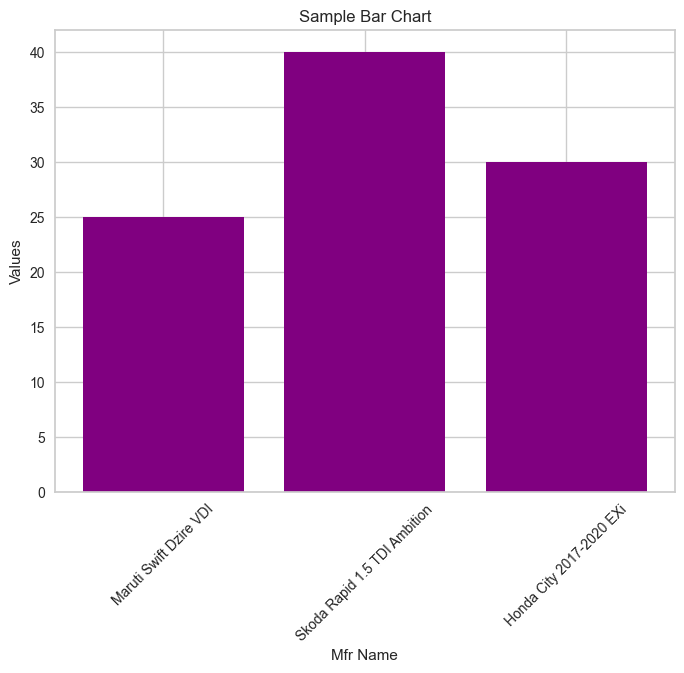

In [21]:
import matplotlib.pyplot as plt

# Sample data for the bar chart
categories = ['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition', 'Honda City 2017-2020 EXi']
values = [25, 40, 30]

# Create a bar chart
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.bar(categories, values, color='purple')

# Add labels and title
plt.xlabel('Mfr Name')
plt.ylabel('Values')
plt.title('Sample Bar Chart')

# Display the bar chart
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

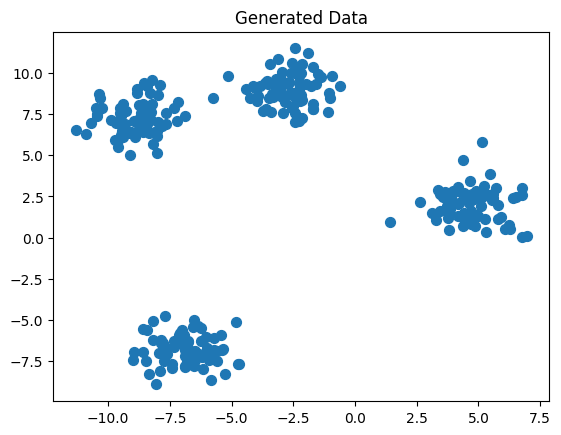

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


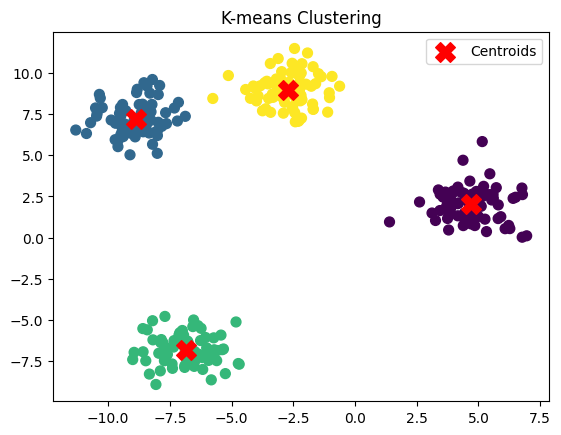

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Visualize the data
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title("Generated Data")
plt.show()

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-means Clustering")
plt.legend()
plt.show()
